In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [3]:
df = pd.read_csv('buoy_signal.csv')
df

,t,eta
0,0.0,-1.22290
1,0.1,-1.17640
2,0.2,-1.11410
3,0.3,-1.04980
4,0.4,-0.97251
...,...,...
17996,1799.6,-0.99451
17997,1799.7,-1.07840
17998,1799.8,-1.16160
17999,1799.9,-1.21940


In [4]:
t = df['t']
eta = df['eta']

In [5]:
x = [0, 1800]
y = [0, 0]

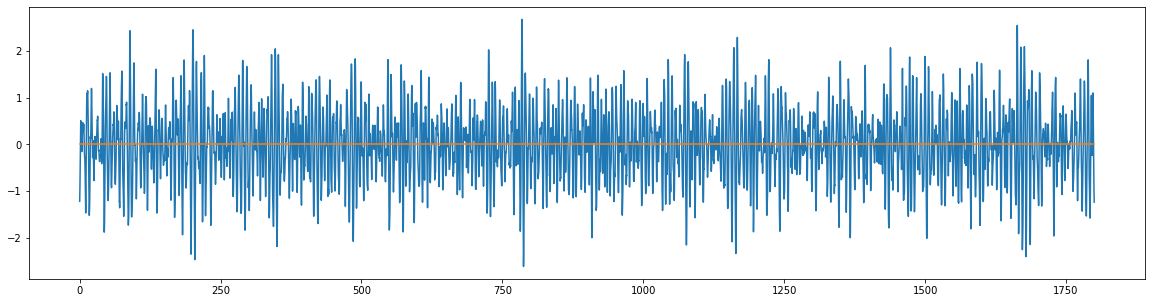

In [6]:
plt.figure(figsize=(20,5))
plt.plot(t, eta)
plt.plot(x, y)
plt.show()

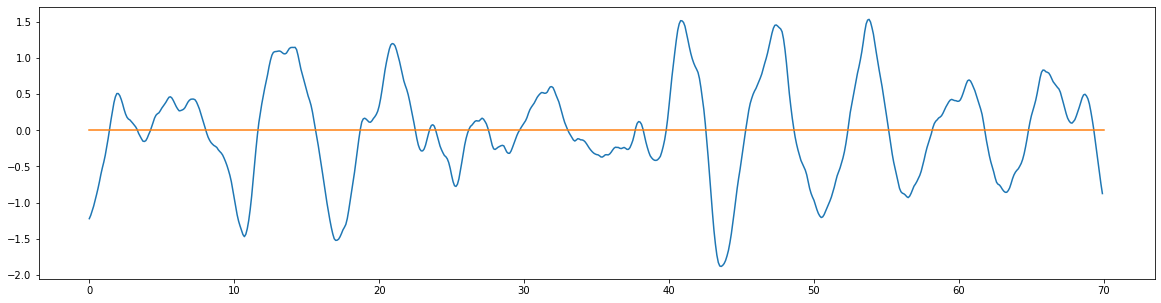

In [7]:
xs = [0, 70]
ys = [0, 0]

plt.figure(figsize=(20,5))
plt.plot(t[:700], eta[:700])
plt.plot(xs, ys)
plt.show()

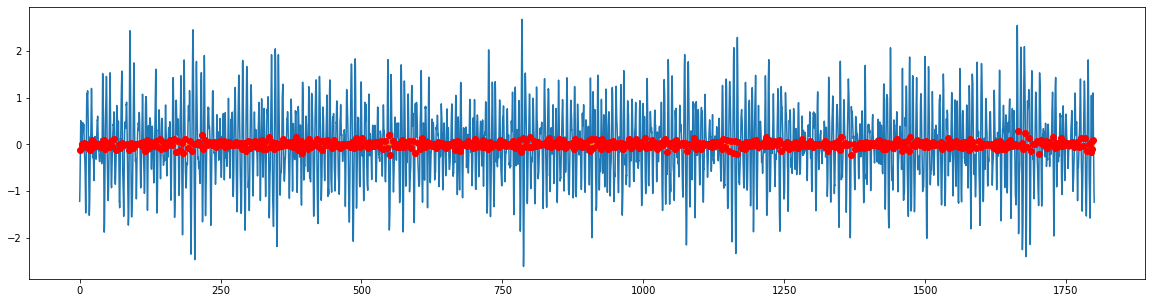

In [11]:
x = t
f = eta
g = np.full((18001), 0)

plt.figure(figsize=(20,5))
plt.plot(x, f, '-')
plt.plot(x, g, '-')

idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
plt.plot(x[idx], f[idx], 'ro')
plt.show()

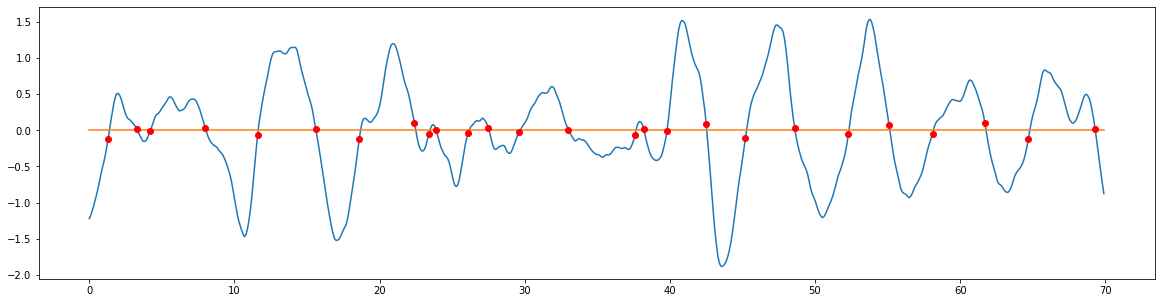

In [12]:
x = t[:700]
f = eta[:700]
g = np.full((700), 0)

plt.figure(figsize=(20,5))
plt.plot(x, f, '-')
plt.plot(x, g, '-')

idx_s = np.argwhere(np.diff(np.sign(f - g))).flatten()
plt.plot(x[idx_s], f[idx_s], 'ro')
plt.show()

In [13]:
new_idx = idx[::2]
new_idx

array([   13,    42,   116,   186,   234,   261,   296,   376,   398,
         452,   523,   581,   647,   720,   793,   878,   945,   980,
        1022,  1100,  1159,  1215,  1235,  1280,  1329,  1388,  1445,
        1513,  1567,  1632,  1701,  1775,  1837,  1916,  1992,  2058,
        2142,  2193,  2259,  2344,  2423,  2475,  2525,  2573,  2629,
        2678,  2738,  2806,  2878,  2912,  2947,  3022,  3090,  3116,
        3163,  3218,  3260,  3313,  3385,  3451,  3514,  3586,  3657,
        3737,  3785,  3819,  3868,  3906,  3944,  4003,  4054,  4105,
        4171,  4239,  4303,  4368,  4426,  4479,  4543,  4614,  4677,
        4724,  4799,  4870,  4928,  4982,  5050,  5118,  5148,  5190,
        5227,  5275,  5328,  5376,  5454,  5511,  5584,  5624,  5692,
        5750,  5797,  5816,  5878,  5946,  6036,  6093,  6126,  6182,
        6244,  6319,  6406,  6451,  6505,  6531,  6580,  6660,  6710,
        6749,  6804,  6878,  6908,  6975,  7040,  7097,  7139,  7174,
        7244,  7305,

In [15]:
len(new_idx)

320

In [16]:
T = []
for i in range(len(new_idx)):
    t = new_idx[i]-new_idx[i-1]
    T.append(t)
    
T = T[1:]

In [17]:
T

[29,
 74,
 70,
 48,
 27,
 35,
 80,
 22,
 54,
 71,
 58,
 66,
 73,
 73,
 85,
 67,
 35,
 42,
 78,
 59,
 56,
 20,
 45,
 49,
 59,
 57,
 68,
 54,
 65,
 69,
 74,
 62,
 79,
 76,
 66,
 84,
 51,
 66,
 85,
 79,
 52,
 50,
 48,
 56,
 49,
 60,
 68,
 72,
 34,
 35,
 75,
 68,
 26,
 47,
 55,
 42,
 53,
 72,
 66,
 63,
 72,
 71,
 80,
 48,
 34,
 49,
 38,
 38,
 59,
 51,
 51,
 66,
 68,
 64,
 65,
 58,
 53,
 64,
 71,
 63,
 47,
 75,
 71,
 58,
 54,
 68,
 68,
 30,
 42,
 37,
 48,
 53,
 48,
 78,
 57,
 73,
 40,
 68,
 58,
 47,
 19,
 62,
 68,
 90,
 57,
 33,
 56,
 62,
 75,
 87,
 45,
 54,
 26,
 49,
 80,
 50,
 39,
 55,
 74,
 30,
 67,
 65,
 57,
 42,
 35,
 70,
 61,
 58,
 73,
 62,
 73,
 80,
 66,
 34,
 28,
 52,
 60,
 72,
 68,
 62,
 66,
 75,
 64,
 59,
 29,
 44,
 54,
 62,
 58,
 28,
 65,
 72,
 55,
 42,
 44,
 66,
 30,
 43,
 50,
 81,
 65,
 45,
 35,
 46,
 62,
 71,
 67,
 17,
 56,
 68,
 58,
 18,
 57,
 44,
 37,
 59,
 71,
 56,
 76,
 57,
 32,
 77,
 75,
 65,
 63,
 42,
 40,
 76,
 64,
 61,
 30,
 60,
 34,
 53,
 66,
 40,
 35,
 57,
 45,
 31,


In [18]:
H = []
for i in range(len(new_idx)):
    h = max(eta[new_idx[i]:new_idx[i+1]]) - min(eta[new_idx[i]:new_idx[i+1]])
    H.append(h)
    if i == 318:
        break

In [19]:
H

[0.6637000000000001,
 1.93655,
 2.6733000000000002,
 1.4864199999999999,
 0.8541719999999999,
 0.48623000000000005,
 0.97522,
 0.5377299999999999,
 3.4035,
 2.6664000000000003,
 2.4682,
 1.55592,
 2.19597,
 3.1177,
 2.64166,
 4.0004,
 1.8328250000000001,
 1.17073908,
 1.6218,
 2.1282,
 2.4406,
 0.56574,
 1.10217,
 1.21567,
 3.0879,
 1.4798900000000001,
 1.0074,
 1.52291,
 1.6853500000000001,
 2.9999000000000002,
 2.04535,
 3.4168000000000003,
 2.74994,
 3.5128,
 4.9353,
 2.61927,
 3.2028,
 3.4393000000000002,
 2.53612,
 2.00717,
 0.97618,
 1.26271,
 1.4258199999999999,
 1.15125,
 1.71458,
 1.80999,
 2.67,
 2.9691,
 1.894368,
 1.890701,
 3.0951,
 2.3872999999999998,
 0.8089000000000001,
 0.99684,
 2.1046199999999997,
 1.6821000000000002,
 1.89226,
 2.5999,
 3.6867,
 4.2447,
 3.0161,
 2.08245,
 1.85813,
 1.97435,
 0.77505,
 1.75441,
 1.08819,
 1.7198900000000001,
 2.10093,
 1.19006,
 2.04175,
 2.6368,
 3.0795,
 2.6599,
 1.5796999999999999,
 2.1756,
 2.4099,
 1.66209,
 2.0031499999999998,

In [46]:
TH_matrix = np.column_stack((T, H))

In [47]:
data = pd.DataFrame(TH_matrix)

In [51]:
data

,0,1
0,29.0,0.663700
1,74.0,1.936550
2,70.0,2.673300
3,48.0,1.486420
4,27.0,0.854172
...,...,...
314,82.0,2.311200
315,74.0,2.837700
316,68.0,2.899100
317,64.0,3.398100


In [56]:
T_sorted = data.sort_values(by=[0], ascending=False)

In [57]:
T_sorted

,0,1
103,90.0,1.803750
229,87.0,1.709130
109,87.0,1.534020
294,86.0,2.066940
14,85.0,2.641660
...,...,...
167,17.0,0.335210
305,16.0,0.228653
257,16.0,0.262440
214,14.0,0.313160


In [58]:
H_sorted = data.sort_values(by=[1], ascending=False)

In [59]:
H_sorted

,0,1
136,60.0,5.304500
34,66.0,4.935300
297,64.0,4.508400
295,61.0,4.470100
205,67.0,4.417400
...,...,...
257,16.0,0.262440
305,16.0,0.228653
217,20.0,0.223609
312,19.0,0.107847


In [78]:
H1_3 = sum(H_sorted[:int(round(len(H_sorted)/3, 0))][1])/(int(round(len(H_sorted)))/3)

In [79]:
H1_3

3.01757275862069

In [83]:
T1_3 = sum(T_sorted[:int(round(len(T_sorted)/3, 0))][0])/(int(round(len(T_sorted)))/3)

In [84]:
T1_3

73.0626959247649

In [85]:
H1_10 = sum(H_sorted[:10][1])/(10)
H1_10

4.42197

In [86]:
T1_10 = sum(T_sorted[:10][0])/(10)
T1_10

85.0

In [87]:
H1_100 = sum(H_sorted[:100][1])/(100)
T1_100 = sum(T_sorted[:100][0])/(100)
H1_100, T1_100

(3.0641922000000004, 73.73)

In [88]:
H1_250 = sum(H_sorted[:250][1])/(250)
T1_250 = sum(T_sorted[:250][0])/(250)
H1_250, T1_250

(2.29289273232, 63.192)

In [91]:
H_max = max(data[1])
T_max = max(data[0])
H_max, T_max

(5.3045, 90.0)